In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


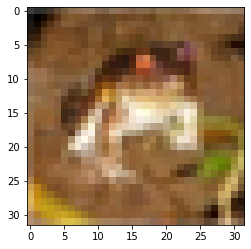

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train[0].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(x_train[index])

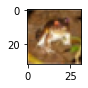

In [ ]:
plot_sample(0)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

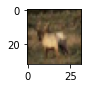

In [ ]:
plot_sample(3)

In [ ]:
y_train[3]

array([4], dtype=uint8)

In [ ]:
classes[y_train[3][0]]

'deer'

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype= 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype= 'float32'
)

In [ ]:
#input layer size
32*32*3

3072

In [ ]:
#this is discrete values
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
#one hot encoding
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

model.compile(optimizer = 'SGD',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 14s 6ms/step - loss: 1.8128 - accuracy: 0.3529
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6218 - accuracy: 0.4281
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5418 - accuracy: 0.4559
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4800 - accuracy: 0.4783
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4308 - accuracy: 0.4950
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3897 - accuracy: 0.5114
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3514 - accuracy: 0.5246
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3178 - accuracy: 0.5376
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2842 - accuracy: 0.5499
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2

In [ ]:
model.predict(x_test_scaled)[0]

313/313 [==============================] - 1s 2ms/step


array([0.14112   , 0.4530073 , 0.40196314, 0.9996288 , 0.99080104,
       0.93649447, 0.10380525, 0.00103601, 0.42338923, 0.04047692],
      dtype=float32)

In [ ]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [ ]:
classes[y_test[1][0]]

'ship'

In [ ]:
model.evaluate(x_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6726 - accuracy: 0.5491


[1.6726125478744507, 0.5490999817848206]

In [ ]:
def get_model():
  model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

  ])

  model.compile(optimizer = 'SGD',
            loss = 'categorical_crossentropy',
          metrics = ['accuracy'])
  return model


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 131s 83ms/step - loss: 1.8101 - accuracy: 0.3530
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 8s 5ms/step - loss: 1.8093 - accuracy: 0.3567
12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 126s 80ms/step - loss: 1.8099 - accuracy: 0.3538
Epoch 2/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.6223 - accuracy: 0.4287
Epoch 3/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.5438 - accuracy: 0.4572
Epoch 4/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4819 - accuracy: 0.4771
Epoch 5/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.4322 - accuracy: 0.4964
Epoch 6/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3882 - accuracy: 0.5135
Epoch 7/10
1563/1563 [==============================] - 126s 81ms/step - loss: 1.3532 - accuracy: 0.5263
Epoch 8/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.3186 - accuracy: 0.5374
Epoch 9/10
1563/1563 [==============================] - 127s 81ms/step - loss: 1.2844 - accuracy: 0.5489
Epoch 10/10
1563/1563 [==============================] 

In [ ]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_scaled, y_train_categorical, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8112 - accuracy: 0.3582
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6198 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5401 - accuracy: 0.4573
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4820 - accuracy: 0.4793
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4304 - accuracy: 0.4971
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3859 - accuracy: 0.5125
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3513 - accuracy: 0.5250
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3159 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2814 - accuracy: 0.5507
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.249